In [1]:
# open a .pt file and print the contents
import sys
import torch
def pt_file_contents(file_path):
    try:
        data = torch.load(file_path, map_location='cpu')
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
    

In [2]:
data_dict = pt_file_contents("/teamspace/studios/mere-salmon-k9gx/c3po/logs/rsl_rl/vla/2025-05-26_09-33-29/obs_dict_8.pt")

/tmp/ipykernel_6445/3539819410.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path, map_location='cpu')


In [3]:
type(data_dict)

dict

In [4]:
data_dict["observations"]

{'policy': tensor([[-1.0690e-01, -2.9750e-02, -6.4815e-02, -2.4709e-02,  4.1666e-02,
           2.7554e-02, -6.9674e-02, -2.7866e-02,  1.4706e-02, -3.3897e-02,
           5.8468e-03, -3.5171e-02,  1.8080e-04,  1.6441e-04,  5.9437e-05,
           1.2694e-04,  9.9172e-03,  5.8175e-04,  9.7774e-04]]),
 'camera': tensor([[[[ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           ...,
           [ 0.4324,  0.3883,  0.4314],
           [ 0.4089,  0.3687,  0.4118],
           [ 0.0794,  0.0393,  0.0824]],
 
          [[ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           ...,
           [ 0.4324,  0.3883,  0.4314],
           [ 0.4128,  0.3687,  0.4118],
           [ 0.0559,  0.0118,  0.0549]],
 
          [[ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           [ 0.4363,  0.3922,  0.4353],
           ...,
           [ 0.4363,  0.3922,  0.435

In [5]:
# print the keys in the dictionary
for key in data_dict.keys():
    print(key)

log
observations
time_outs


In [6]:
data = data_dict["observations"]

In [7]:
# shape of data
if isinstance(data, dict):
    for key, value in data.items():
        if isinstance(value, torch.Tensor):
            print(f"{key} shape: {value.shape}")
        else:
            print(f"{key} type: {type(value)}")

policy shape: torch.Size([1, 19])
camera shape: torch.Size([1, 256, 256, 3])
table_camera shape: torch.Size([1, 256, 256, 3])


In [8]:
data["policy"]

tensor([[-1.0690e-01, -2.9750e-02, -6.4815e-02, -2.4709e-02,  4.1666e-02,
          2.7554e-02, -6.9674e-02, -2.7866e-02,  1.4706e-02, -3.3897e-02,
          5.8468e-03, -3.5171e-02,  1.8080e-04,  1.6441e-04,  5.9437e-05,
          1.2694e-04,  9.9172e-03,  5.8175e-04,  9.7774e-04]])

In [9]:
data["camera"].shape

torch.Size([1, 256, 256, 3])

In [10]:
img = data["camera"]

In [11]:
img.shape

torch.Size([1, 256, 256, 3])

In [12]:
# display the image img with size (1, 256, 256, 3)
import matplotlib.pyplot as plt
def display_image(image_tensor):
    if image_tensor.ndim == 4:
        image_tensor = image_tensor.squeeze(0)  # Remove batch dimension
    plt.imshow(image_tensor)  # Change from (C, H, W) to (H, W, C)
    plt.axis('off')
    plt.show()

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


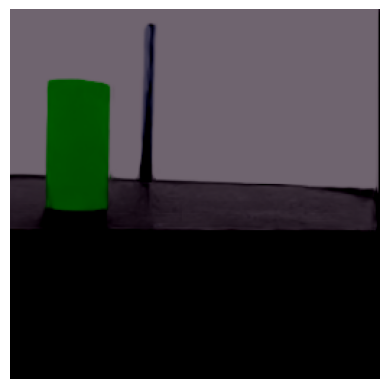

In [ ]:
display_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


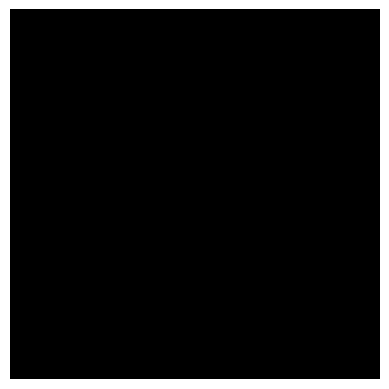

In [ ]:
display_image(data["table_camera"])


In [ ]:
data["table_camera"][0][1][1]

In [ ]:
img = data["table_camera"]

In [ ]:
img.shape

torch.Size([1, 256, 256, 3])

In [ ]:
# convert to shape (1, 1, 256, 256, 3)
img = img.unsqueeze(0)

In [ ]:
img.shape

torch.Size([1, 1, 256, 256, 3])

In [ ]:
# stack 5 duplicate img along the second dimension
img_stack = img.repeat(1, 5, 1, 1, 1)

In [ ]:
img_stack.shape

torch.Size([1, 5, 256, 256, 3])

In [ ]:
img_stack.type()

'torch.FloatTensor'

In [ ]:
# play img_stack like a video
from IPython.display import display, clear_output
import time
def play_video(image_stack, interval=0.1):
    image_stack = image_stack.squeeze(0)  # Remove batch dimension
    # while True:
    for img in image_stack:
        display_image(img)
        time.sleep(interval)
        clear_output(wait=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


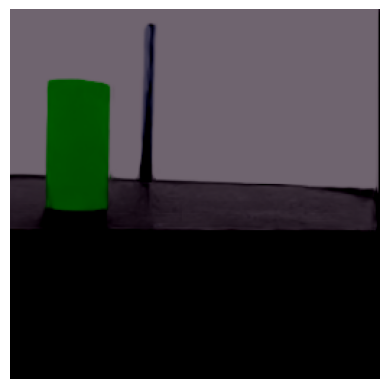

KeyboardInterrupt: 

In [ ]:
play_video(img_stack)

In [ ]:
# stack different img along second dimension
img_stack = torch.stack([data["camera"], data["table_camera"]], dim=1)

In [1]:
from vla.online_data import OnlineBuffer
from vla.data_config import *

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchrl/data/replay_buffers/samplers.py:34: UserWarning: Failed to import torchrl C++ binaries. Some modules (eg, prioritized replay buffers) may not work with your installation. This is likely due to a discrepancy between your package version and the PyTorch version. Make sure both are compatible. Usually, torchrl majors follow the pytorch majors within a few days around the release. For instance, TorchRL 0.5 requires PyTorch 2.4.0, and TorchRL 0.6 requires PyTorch 2.5.0.
  warnings.warn(EXTENSION_WARNING)
2025-05-30 06:22:25.063115: E external/local_xla/xla/stream_executor/cuda/

In [2]:
# open a .pt file and print the contents
import sys
import torch
def pt_file_contents(file_path):
    try:
        data = torch.load(file_path, map_location='cpu')
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")

In [3]:
data_dict = pt_file_contents("/teamspace/studios/mere-salmon-k9gx/c3po/logs/rsl_rl/vla/2025-05-26_09-33-29/obs_dict_8.pt")

/tmp/ipykernel_4778/1167296463.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path, map_location='cpu')


In [4]:
data_config = NeuraDataConfig()

In [5]:
buffer = OnlineBuffer(data_config)

In [9]:
new_dict = buffer.add_obs_from_isaac(data_dict)

In [10]:
buffer.add_to_replay_buffer(data_dict)

In [23]:
buffer.replay_buffer["video"]["camera"].shape

torch.Size([2, 256, 256, 3])

In [7]:
# print the keys in the new dictionary
for modality_label, sub_data in new_dict.items():
    for key, values in sub_data.items():
        if isinstance(values, torch.Tensor):
            print(f"{modality_label} - {key} shape: {values.shape}")
        else:
            print(f"{modality_label} - {key} type: {type(values)}")

state - policy shape: torch.Size([1, 19])
video - camera shape: torch.Size([1, 256, 256, 3])
video - table_camera shape: torch.Size([1, 256, 256, 3])


In [8]:
from vla.online_data import Data

In [9]:
d = Data(new_dict)

In [10]:
d

In [11]:
d[0].video.camera

tensor([[[[ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          ...,
          [ 0.4324,  0.3883,  0.4314],
          [ 0.4089,  0.3687,  0.4118],
          [ 0.0794,  0.0393,  0.0824]],

         [[ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          ...,
          [ 0.4324,  0.3883,  0.4314],
          [ 0.4128,  0.3687,  0.4118],
          [ 0.0559,  0.0118,  0.0549]],

         [[ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          [ 0.4363,  0.3922,  0.4353],
          ...,
          [ 0.4363,  0.3922,  0.4353],
          [ 0.4167,  0.3726,  0.4157],
          [ 0.0245, -0.0195,  0.0275]],

         ...,

         [[-0.4617, -0.5058, -0.4627],
          [-0.4617, -0.5058, -0.4627],
          [-0.4617, -0.5058, -0.4666],
          ...,
          [-0.4578, -0.5019, -0.4588],
          [-0.4657, -0.5136, -0.4666],
          [-0.5088, -0

In [12]:
a = Data(new_dict)

In [13]:
from torch.utils.data.dataset import Dataset, IterableDataset, ChainDataset, ConcatDataset

In [14]:
new = ConcatDataset([d,a])

In [ ]:
new.shape

AttributeError: 'ConcatDataset' object has no attribute 'shape'